In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import numpy as np

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


target
0    4342
1    3271
Name: count, dtype: int64


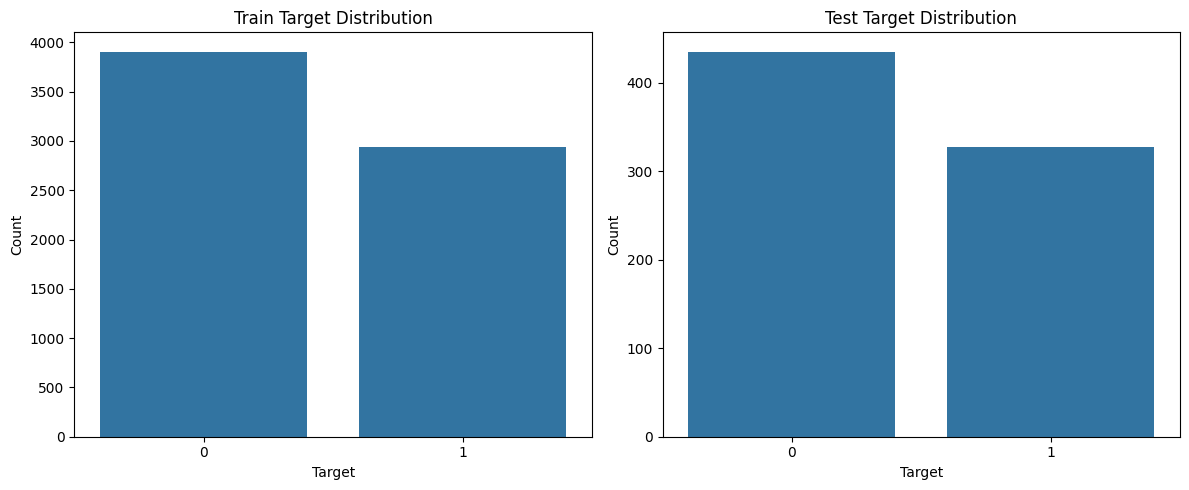

In [3]:
print(df["target"].value_counts())

train_df, test_df = train_test_split(df,test_size=0.10,stratify=df["target"],random_state=0)

train_counts = train_df["target"].value_counts().sort_index()
test_counts = test_df["target"].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=train_counts.index, y=train_counts.values, ax=axes[0])
axes[0].set_title("Train Target Distribution")
axes[0].set_xlabel("Target")
axes[0].set_ylabel("Count")

sns.barplot(x=test_counts.index, y=test_counts.values, ax=axes[1])
axes[1].set_title("Test Target Distribution")
axes[1].set_xlabel("Target")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

Το dataset δεν είναι πλήρως ισορροπημένο, καθώς η κλάση target=0 εμφανίζεται συχνότερα από την target=1. Ωστόσο, η διαφορά μεταξύ των κλάσεων είναι μικρή. Η χρήση stratified train–test split διατηρεί την κατανομή των κλάσεων τόσο στο σύνολο εκπαίδευσης όσο και στο σύνολο δοκιμής, όπως φαίνεται στα παραπάνω bar-plots. Άραρ μπορούμε να ισχυριστούμε ότι το dataset θεωρείται ισορροπημένο.

In [4]:
train_df.drop(columns=["id", "location"], inplace=True)
test_df.drop(columns=["id", "location"], inplace=True)

train_df.fillna("null", inplace=True)
test_df.fillna("null", inplace=True)

train_df["inputs"] = train_df["keyword"] + " " + train_df["text"]
test_df["inputs"] = test_df["keyword"] + " " + test_df["text"]

In [5]:
train_df.head(20)

,keyword,text,target,inputs
6669,threat,Meek Mill responds to DrakeÛªs OVO Fest set w...,1,threat Meek Mill responds to DrakeÛªs OVO Fes...
3940,flood,survived the plague\nfloated the flood\njust p...,0,flood survived the plague\nfloated the flood\n...
7217,weapons,#Kick Hendrixonfire @'=BLACKCATS= | BIG NOOB ...,0,weapons #Kick Hendrixonfire @'=BLACKCATS= | B...
2234,deluge,Vince McMahon once again a billionaire: I reme...,0,deluge Vince McMahon once again a billionaire:...
4233,hazardous,Is it possible to sneak into a hospital so I c...,0,hazardous Is it possible to sneak into a hospi...
6050,sinkhole,Large sinkhole swallows entire pond in Lowndes...,1,sinkhole Large sinkhole swallows entire pond i...
6518,survive,It's going on three years that we have been se...,0,survive It's going on three years that we have...
1290,burned,@thomasvissman22 @KeithyyL Keithyy gettin burn...,0,burned @thomasvissman22 @KeithyyL Keithyy gett...
5967,screaming,@MissDaOh and if she had a screaming baby you ...,0,screaming @MissDaOh and if she had a screaming...
2623,destruction,Don't be the cause of your own self destruction,0,destruction Don't be the cause of your own sel...


In [7]:
def remove_urls(text):
    return re.sub(r"http\S+|www\S+", "", text)

def remove_mentions(text):
    return re.sub(r"@\w+", "", text)

def remove_hashtags(text):
    return re.sub(r"#", "", text)

def removeEmoticons(text):
    """ Removes emoticons from text """
    text = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', text)
    return text

def clean_text(text):
    text = text.lower()
    text = remove_urls(text)
    text = remove_mentions(text)
    text = remove_hashtags(text)
    text = removeEmoticons(text)
    return text

train_df["inputs_clean"] = train_df["inputs"].apply(clean_text)
test_df["inputs_clean"] = test_df["inputs"].apply(clean_text)

<>:12: SyntaxWarning: invalid escape sequence '\)'
<>:12: SyntaxWarning: invalid escape sequence '\)'
/tmp/ipython-input-520310315.py:12: SyntaxWarning: invalid escape sequence '\)'
  text = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', text)


Η προεπεξεργασία περιλαμβάνει μετατροπή του κειμένου σε πεζά ώστε οι λεξεις να είναι σε μια μορφή, αφαίρεση URLs επειδή δεν συνεισφέρουν κάποια σημαντική πληροφορία στο περιεχόμενο του tweet, αφαίρεση mentions χρηστών (@user) που είναι άσχετα με το γεγονός που περιγράφεται, αφαίρεση του συμβόλου των hashtags ώστε να διατηρείται η λέξη χωρίς τον χαρακτήρα # και αφαίρεση emoticons/emoji γιατί δεν προσφέρουν κάποια πληροφορία.

In [9]:
x_train = train_df["inputs_clean"].values
y_train = train_df["target"].values

x_test = test_df["inputs_clean"].values
y_test = test_df["target"].values

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(x_train)

x_test_tfidf = tfidf.transform(x_test)

In [25]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_clf = LinearSVC(random_state=0)
svm_clf.fit(x_train_tfidf, y_train)

y_train_pred = svm_clf.predict(x_train_tfidf)
y_test_pred = svm_clf.predict(x_test_tfidf)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("TRAIN METRICS")
print(f"Accuracy : {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall   : {train_recall:.4f}")
print(f"F1-score : {train_f1:.4f}")

print("\nTEST METRICS")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall   : {test_recall:.4f}")
print(f"F1-score : {test_f1:.4f}")

metrics_linear = {
    "accuracy": accuracy_score(y_test, y_test_pred),
    "precision": precision_score(y_test, y_test_pred),
    "recall": recall_score(y_test, y_test_pred),
    "f1": f1_score(y_test, y_test_pred)}

TRAIN METRICS
Accuracy : 0.9637
Precision: 0.9777
Recall   : 0.9368
F1-score : 0.9568

TEST METRICS
Accuracy : 0.7966
Precision: 0.7810
Recall   : 0.7309
F1-score : 0.7551


In [12]:
from sklearn.metrics import classification_report

print("CLASSIFICATION REPORT – TRAIN")
print(classification_report(y_train, y_train_pred, digits=4))

print("CLASSIFICATION REPORT – TEST")
print(classification_report(y_test, y_test_pred, digits=4))

CLASSIFICATION REPORT – TRAIN
              precision    recall  f1-score   support

           0     0.9538    0.9839    0.9686      3907
           1     0.9777    0.9368    0.9568      2944

    accuracy                         0.9637      6851
   macro avg     0.9658    0.9603    0.9627      6851
weighted avg     0.9641    0.9637    0.9635      6851

CLASSIFICATION REPORT – TEST
              precision    recall  f1-score   support

           0     0.8070    0.8460    0.8260       435
           1     0.7810    0.7309    0.7551       327

    accuracy                         0.7966       762
   macro avg     0.7940    0.7884    0.7906       762
weighted avg     0.7959    0.7966    0.7956       762



Το dataset δεν είναι πλήρως ισορροπημένο και το πρόβλημα αφορά την ανίχνευση πραγματικών καταστροφών, όπου τόσο τα false negatives, να χαθεί μια πραγματική καταστροφή, όσο και τα false positives έχουν κόστος. Το F1-score συνδυάζει Precision και Recall, προσφέροντας πιο αξιόπιστη αξιολόγηση από το Accuracy, το οποίο μπορεί να είναι παραπλανητικό σε ελαφρώς ανισόρροπα σύνολα δεδομένων.

In [13]:
from sklearn.decomposition import PCA

x_train_dense = x_train_tfidf.toarray()
x_test_dense = x_test_tfidf.toarray()

pca = PCA(n_components=0.95, random_state=0)

x_train_pca = pca.fit_transform(x_train_dense)
x_test_pca = pca.transform(x_test_dense)

In [24]:
linear_svm = LinearSVC(random_state=0)
linear_svm.fit(x_train_pca, y_train)

y_test_pred_linear = linear_svm.predict(x_test_pca)

rbf_svm = SVC(kernel="rbf", random_state=0)
rbf_svm.fit(x_train_pca, y_train)

y_test_pred_rbf = rbf_svm.predict(x_test_pca)

metrics_linear_pca = {
    "accuracy": accuracy_score(y_test, y_test_pred_linear),
    "precision": precision_score(y_test, y_test_pred_linear),
    "recall": recall_score(y_test, y_test_pred_linear),
    "f1": f1_score(y_test,y_test_pred_linear)}

metrics_rbf_scale = {
    "accuracy": accuracy_score(y_test, y_test_pred_rbf),
    "precision": precision_score(y_test, y_test_pred_rbf),
    "recall": recall_score(y_test, y_test_pred_rbf),
    "f1": f1_score(y_test, y_test_pred_rbf)}

In [21]:
def evaluate_model(y_true, y_pred, name):
    print(f"\n{name}")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score : {f1_score(y_true, y_pred):.4f}")
    print("CLASSIFICATION REPORT")
    print(classification_report(y_true, y_pred, digits=4))


evaluate_model(y_test, y_test_pred_linear, "LinearSVC + PCA")
evaluate_model(y_test, y_test_pred_rbf, "SVC (RBF) + PCA")


LinearSVC + PCA
Accuracy : 0.8045
Precision: 0.7928
Recall   : 0.7370
F1-score : 0.7639
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0     0.8122    0.8552    0.8331       435
           1     0.7928    0.7370    0.7639       327

    accuracy                         0.8045       762
   macro avg     0.8025    0.7961    0.7985       762
weighted avg     0.8039    0.8045    0.8034       762


SVC (RBF) + PCA
Accuracy : 0.8202
Precision: 0.8188
Recall   : 0.7462
F1-score : 0.7808
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0     0.8211    0.8759    0.8476       435
           1     0.8188    0.7462    0.7808       327

    accuracy                         0.8202       762
   macro avg     0.8200    0.8110    0.8142       762
weighted avg     0.8201    0.8202    0.8189       762



In [22]:
svc_rbf_auto = SVC(kernel="rbf", gamma="auto", random_state=0)
svc_rbf_auto.fit(x_train_pca, y_train)

y_pred_auto = svc_rbf_auto.predict(x_test_pca)

metrics_rbf_auto = {
    "accuracy": accuracy_score(y_test, y_pred_auto),
    "precision": precision_score(y_test, y_pred_auto),
    "recall": recall_score(y_test, y_pred_auto),
    "f1": f1_score(y_test, y_pred_auto)}

metrics_rbf_auto

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 0.5708661417322834, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}

In [23]:
print(classification_report(y_test, y_pred_auto))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       435
           1       0.00      0.00      0.00       327

    accuracy                           0.57       762
   macro avg       0.29      0.50      0.36       762
weighted avg       0.33      0.57      0.41       762



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Η παράμετρος gamma=scale, η οποία εξαρτάται από τη διακύμανση και τον αριθμό χαρακτηριστικών, οδηγεί σε πιο σταθερή και γενικεύσιμη απόδοση σε σχέση με το gamma=auto. Από τη σύγκριση των τεσσάρων μοντέλων, ο LinearSVC (με ή χωρίς PCA) εμφανίζεται καταλληλότερος για ταξινόμηση κειμένου, ενώ ο RBF kernel δεν προσφέρει σημαντική βελτίωση με αυξημένο υπολογιστικό κόστος.

In [26]:
models_metrics = {
    "LinearSVC": metrics_linear,
    "LinearSVC + PCA": metrics_linear_pca,
    "RBF (scale)": metrics_rbf_scale,
    "RBF (auto)": metrics_rbf_auto}

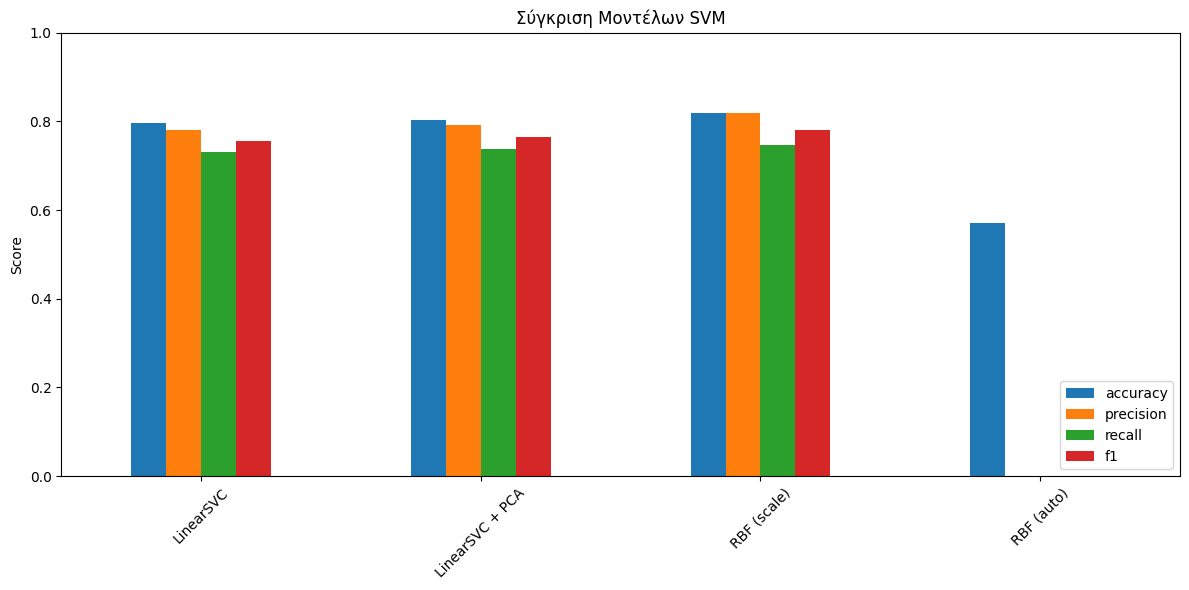

In [27]:
df_metrics = pd.DataFrame(models_metrics).T

df_metrics.plot(kind="bar", figsize=(12,6))
plt.title("Σύγκριση Μοντέλων SVM")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [29]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train_dense, y_train)

y_train_pred_gnb = gnb.predict(x_train_dense)
y_test_pred_gnb  = gnb.predict(x_test_dense)

print("GAUSSIAN NB — TRAIN")
print(f"Accuracy : {accuracy_score(y_train, y_train_pred_gnb):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred_gnb):.4f}")
print(f"Recall   : {recall_score(y_train, y_train_pred_gnb):.4f}")
print(f"F1-score : {f1_score(y_train, y_train_pred_gnb):.4f}")

print("\nGAUSSIAN NB — TEST")
print(f"Accuracy : {accuracy_score(y_test, y_test_pred_gnb):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_gnb):.4f}")
print(f"Recall   : {recall_score(y_test, y_test_pred_gnb):.4f}")
print(f"F1-score : {f1_score(y_test, y_test_pred_gnb):.4f}")

print("\nCLASSIFICATION REPORT — TEST")
print(classification_report(y_test, y_test_pred_gnb, digits=4))

GAUSSIAN NB — TRAIN
Accuracy : 0.8825
Precision: 0.7853
Recall   : 1.0000
F1-score : 0.8797

GAUSSIAN NB — TEST
Accuracy : 0.6181
Precision: 0.5370
Recall   : 0.7982
F1-score : 0.6421

CLASSIFICATION REPORT — TEST
              precision    recall  f1-score   support

           0     0.7609    0.4828    0.5907       435
           1     0.5370    0.7982    0.6421       327

    accuracy                         0.6181       762
   macro avg     0.6490    0.6405    0.6164       762
weighted avg     0.6648    0.6181    0.6128       762

